In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import RESCAL

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [5]:
print(time.asctime())

Tue Apr  2 15:50:02 2019


In [6]:
print(pykeen.get_version())

0.0.22


Check which hyper-parameters are required by RESCAL:

In [7]:
RESCAL.hyper_params

['embedding_dim', 'margin_loss', 'learning_rate', 'scoring_function']

Define output directory:

In [8]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

In [9]:
config = dict(
    training_set_path           = '../../data/rdf.nt',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'RESCAL',
    embedding_dim               = 50,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 1,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    preferred_device            = 'cpu'
)

Train RESCAL:

In [10]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

/Users/mehdi/virtual_envs/pykeen_python_3_7/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [00:00<00:00, 114.21it/s]


Check result entries:

In [11]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Access trained model:

In [12]:
results.results['trained_model']

RESCAL(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(89, 50)
  (relation_embeddings): Embedding(24, 2500)
)

Visualize loss values:

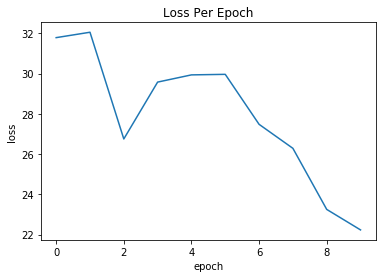

In [13]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()